# https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a

In [4]:
import pandas as pd
### make X and y
X = pd.DataFrame({'age': [25, 32, 47, 51, 62],
                  'height': [182, 176, 174, 168, 181],
                  'weight': [75, 71, 78, 72, 86]})
y = pd.Series([20, 32, 45, 55, 61], name = 'income')

In [5]:
import numpy as np
### make X_shadow by randomly permuting each column of X
np.random.seed(42)
X_shadow = X.apply(np.random.permutation)
X_shadow.columns = ['shadow_' + feat for feat in X.columns]
### make X_boruta by appending X_shadow to X
X_boruta = pd.concat([X, X_shadow], axis = 1)

In [6]:
from sklearn.ensemble import RandomForestRegressor
### fit a random forest (suggested max_depth between 3 and 7)
forest = RandomForestRegressor(max_depth = 5, random_state = 42)
forest.fit(X_boruta, y)
### store feature importances
feat_imp_X = forest.feature_importances_[:len(X.columns)]
feat_imp_shadow = forest.feature_importances_[len(X.columns):]
### compute hits
hits = feat_imp_X > feat_imp_shadow.max()

/root/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [7]:
### initialize hits counter
hits = np.zeros((len(X.columns)))
### repeat 20 times
for iter_ in range(20):
   ### make X_shadow by randomly permuting each column of X
   np.random.seed(iter_)
   X_shadow = X.apply(np.random.permutation)
   X_boruta = pd.concat([X, X_shadow], axis = 1)
   ### fit a random forest (suggested max_depth between 3 and 7)
   forest = RandomForestRegressor(max_depth = 5, random_state = 42)
   forest.fit(X_boruta, y)
   ### store feature importance
   feat_imp_X = forest.feature_importances_[:len(X.columns)]
   feat_imp_shadow = forest.feature_importances_[len(X.columns):]
   ### compute hits for this trial and add to counter
   hits += (feat_imp_X > feat_imp_shadow.max())

/root/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:2

In [9]:
forest.feature_importances_.sum()

1.0

In [26]:
import scipy as sp
trials = 20
pmf = [sp.stats.binom.pmf(x, trials, .5) for x in range(trials + 1)]

In [27]:
trials

20

In [11]:

import tensorflow as tf
import numpy as np
import pandas as pd , sys
import matplotlib.pyplot as plt
import scikitplot as skplt
from IPython.display import clear_output
from sklearn.metrics import auc , roc_auc_score
from sklearn.model_selection import train_test_split
sys.path.append("/home/advice/Python/SR/Custom/PreProcessingUtils/")
import seaborn as sns
import re , os
from ColMatch import MatchVariable
from TabularDataPipeline import *
from pre_utils import make_dirs
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
from IPython.display import clear_output

/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: P

In [51]:
data = pd.read_csv("./../../../Data/kdd/uci/uci_creditcard-train-0.2-0.0.csv")
in_var = ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
          "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
          "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
target_var = ['default payment next month']
fac_var = [ 'SEX','EDUCATION','MARRIAGE',]
num_var = [i for i in in_var if not i in fac_var]
#in_var = num_var + fac_var

In [96]:
os.getcwd()

'/home/advice/Python/SR/SubProject/2020/FeatureSelection'

In [151]:
train = pd.read_csv("./../../../Data/Churn.csv")
train.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [152]:
train.columns.tolist()


['state',
 'account length',
 'area code',
 'phone number',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

In [153]:
train.columns.tolist()

in_var = ['state',
 'area code',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']
target_var = ["churn"]
num_var = ['number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']
fac_var = [i for i in in_var if not i in num_var]

In [154]:
fac_var

['state', 'area code', 'international plan', 'voice mail plan']

In [52]:
train = data[data.sep_idx ==1 ]
valid = data[data.sep_idx ==0 ]

In [53]:
test = pd.read_csv("./../../../Data/kdd/uci/uci_creditcard-test-0.2-0.0.csv")

In [156]:
pipe = TabularPipeline(in_var, num_var, target_var)

please insert config type in ['Outlier', 'NumericImpute', 'FactorImpute', 'Numeric', 'Category', 'NewVar']


In [157]:
info = {
#     "Outlier" : {"method" : "IQR", "multiple_outlier_n" :4 , "var": num_var} , 
    "NumericImpute" : {"method" : "mean", "var" : num_var},
    "FactorImpute" : {"method" : "most_frequent", "var" : fac_var},
#     "Numeric" : {"method" : "sklearn:minmax", "var" : num_var , 
#                  "method_option" : {"feature_range" : (-1.5,1.5)}},
    "Category" : {"method" : "labelencoding", "dummy_na" : False} , 
       }
pipe.insert(info)
pipe.Steps()
pipe.fit(train)
train = pipe.transform(train)
# valid = pipe.transform(valid)
# test = pipe.transform(test)

Build PipeLine
Transform Missing Data / Method : mean
Transform Missing Data / Method : most_frequent
Fit Category Handler
['account length', 'phone number', 'churn']
Fitting!
Transform Missing Data / Method : mean
Transform Missing Data / Method : most_frequent
Transform Categorical Data / method : labelencoding


In [158]:
train_x ,train_y , _ = pipe.split(train, numpy= False)

In [56]:
train_x ,train_y , _ = pipe.split(train, numpy= False)
valid_x , valid_y , _ = pipe.split(valid, numpy= False)
test_x , test_y , _ = pipe.split(test, numpy= False)

In [126]:
train_x[fac_var] = train_x[fac_var].astype("category")
# trval_lgb = lgb.Dataset(train_x , label = train_y)

In [58]:
from boruta import BorutaPy


In [160]:
from multiprocessing import Pool
import lightgbm as lgb
from functools import partial
def lgb_boruta(iter_,train_x) :
    print(iter_)
    np.random.seed(iter_)
    X_shadow = train_x.apply(np.random.permutation)
    X_boruta = pd.concat([train_x, X_shadow], axis = 1)
    columns = train_x.columns.tolist() + [f"shadow_{i}" for i in train_x.columns.tolist()]
    X_boruta.columns = columns
    boruta_fac_var = fac_var + [f"shadow_{i}" for i in fac_var]
    dtrain = lgb.Dataset(X_boruta,label=train_y,
                         feature_name = columns,
                         categorical_feature = boruta_fac_var)
    param = {'numleaves': 20, 'mindatainleaf': 20,
             'objective':'binary','maxdepth': 5, 
             "boosting": "rf","bagging_freq" : 1 , "bagging_fraction" : 0.8,
             'learningrate': 0.01,"metric": 'auc',
             "lambdal1": 0.1, "randomstate": 133,"verbosity": -1,
             "num_threads" : 1
            }
    lgbmclf = lgb.train(param, dtrain, 500,verbose_eval=-1,
#                         valid_sets=dtrain,
#                         early_stopping_rounds=100,
                         feature_name = columns,
                        categorical_feature= boruta_fac_var)
    importacne = lgbmclf.feature_importance()
    importacne = importacne / importacne.sum()
    feat_imp_X = importacne[:len(train_x.columns)]
    feat_imp_shadow = importacne[len(train_x.columns):]
    value = (feat_imp_X > feat_imp_shadow.max())
    return value

In [161]:
n_iter = 100
pool = Pool(n_iter)
result = pool.map(
    partial(lgb_boruta, train_x =train_x ) ,
    np.arange(n_iter))
pool.close()
pool.join()

0
3
5
6
4
8
1
7
10
12
2
9
11
13
22
24
21
23
28
17
27
29
32
19
15
33
31
20
14
30
25
18
34
35
26
16
36
37
38
39
40
41
42
43
44
45
47
46
48
49
50
53
55
51
52
57
56
54
63
62
64
61
58
59
65
67
60
68
66
74
75
69
72
73
71
70
76
77
78
81
80
79
82
84
83
85
86
87
88
89
90
91
92
93
94
95
96
98
97
99
[ 298 3149  385    0 2943  307   42 1343  434   21  622  572    0  509
   59  500    0  424    9  400  214  515  378  128  165  141  324  320
   98   12  615   44   14    0    0   15]
[ 225 2969  146    0 3073  301   20 1062  346   26  556  522    0  518
   35  500    0  424   40  322   68  229  133  642  170  752  417  636
  110   94  617   28   18    0    0    1]
[ 241 3136  220    0 3048  498   22 1164  415   70  565  569    0  525
   90  500    0  426   86  289  190  412  119  376  367  277  165  400
  359   56  228   40   44    7    0   96][ 356 3112  339    0 3076  289   20 1169  487   39  612  689    0  531
   82  500    0  424    4  251  233  573  168  107  140  208  468  229
  293   28  348  

  181   27  354   23   23    0    0    1]
[ 260 3170  265    0 3180  415   24 1126  525   76  549  539    0  509
  159  500    0  425   94  245  392  383  177  220  242  161  134  163
  369   62  491   54   51    2    0   38][ 327 3104  236    0 3196  348   42 1179  428   51  563  607    0  560
   85  500    0  424    8  140   94  776  364  386  474  157  275  223
   90   42  217   63   16    9    0   16]
[ 276 3172  271    0 3114  463   17 1131  545   67  573  520    0  535
  159  500    0  424   83  171  122  301  218  312  531  352  268  143
  254  214  146   37   78    0    0    3][ 271 3107  391    0 3243  277   40 1281  668   75  608  568    0  509
   51  500    0  424   20  277  129  372  116  360  357  154  192  229
  587   28   94   28   38    0    0    6]


[ 264 3081  270    0 3163  415   23 1097  377   57  560  543    0  543
   87  500    0  427   67  802  311  264  249  268  263  261  106  123
  250   91  377   54  102    2    0    3]
[ 339 3174  352    0 3137  368   27 10

  429   58  294   74   63    1    0    5][ 255 3135  235    0 3159  375   33 1157  470   62  596  548    0  534
   70  500    0  424  300  312  180  509  292  128  196  328  127  294
  366   56  278   30   42    1    0    8]

[ 135 3167  328    0 3376  301   31 1163  608  135  580  564    0  521
   57  500    0  424   82  432  111  408  190  101  100  312  545  259
  174  203  119   29   41    2    0    2]
[ 317 3223  275    0 3150  383   32 1224  363  116  612  536    0  516
   42  500    0  424    8  188  121  163  150  289  202  151  198  223
  689   25  567  192  104    0    0   17]
[ 318 3136  285    0 3117  357   36 1110  526   71  563  551    0  533
   43  500    0  424   90  173  249  259  561  234  229  373  322  404
  104   44  203   27  155    0    0    3]
[ 225 3184  332    0 2887  209   22  942  381   56  565  550    0  529
   85  500    0  425   93  436  172  112  432   98 1032  418  333  255
  111  143  251   45  173    3    0    1]
[ 167 3146  167    0 3114  348   13 12

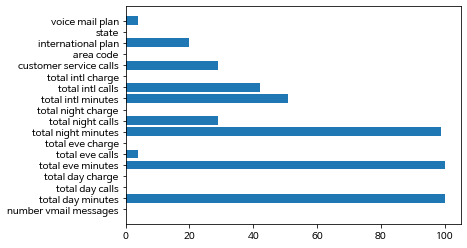

In [162]:
a = np.array(result).sum(axis=0)
plt.barh(np.arange(len(a)),a)
plt.yticks(np.arange(len(a)),labels = train_x.columns.tolist())
plt.show()

In [135]:
a

array([ 88, 100,   0,   0,   0,   0,   0,   0])

In [57]:

dtrain = lgb.Dataset(train_x,label=train_y,
                     categorical_feature = fac_var)
lgbmclf = lgb.train(param, dtrain, 10,verbose_eval=-1,
                    valid_sets=dtrain,
                    early_stopping_rounds=100, categorical_feature= fac_var)
lgbmclf.feature_importance()

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[10]	training's auc: 0.7766
